# Poisson Equation

The Poisson equation is given as,
\begin{equation}
\nabla ^2 p = S,
\end{equation}
where $p$ is a property that depends on space and $S$ is some source.

This can be written in 2D cartesian coordinate as,
\begin{equation}
\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = S(x,y).
\end{equation}

The discretised form of this equation is given as,
\begin{equation}
\frac{p_{i-1,j} - 2p_{i,j} + p_{i+1, j}}{\Delta x^2} + \frac{p_{i,j-1} - 2p_{i,j} + p_{i, j+1}}{\Delta y^2}.
\end{equation}


## Using Jacobi method

\begin{equation}
p_{i,j} = \frac{\Delta x^2 \Delta y^2}{2(\Delta x^2 + \Delta y^2)}S_{i,j} + \frac{\Delta y^2}{2(\Delta x^2 + \Delta y^2)}(p_{i+1, j} + p_{i-1, j}) + \frac{\Delta x^2}{2(\Delta x^2 + \Delta y^2)}(p_{i,j+1} + p_{i, j-1})
\end{equation}

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
from matplotlib import cm

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

plt.rcParams['animation.html'] = 'jshtml'

In [ ]:
Lx = 1.0 
Ly = 1.0

nx = 51 
ny = 51 

x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
dx = x[1] - x[0]
dy = y[1] - y[0]

xx, yy = np.meshgrid(x, y)

p = np.zeros((ny, nx))
S = np.zeros((ny, nx)) 

tol = 1e-2
error = np.inf 
max_it = 500 
it = 0

while error > tol and it < max_it:
    p_k = p.copy() 
    
    # boundary conditions 
    p[-1, :] = 0.0     # top wall
    p[0, :] = 0.0      # bottom wall
    p[:, -1] = 0.0     # right wall 
    p[:, 0] = 0.0      # left wall 
    p[10:-10, 0] = 1.0 # left wall

    for i in range(1, nx-1):
        for j in range(1, ny-1):
            p[j, i] = 1.0/2.0/(dx*dx + dy*dy) * ((dx*dx*dy*dy)*S[j, i]  + dy*dy*(p_k[j,i+1] + p_k[j, i-1]) + dx*dx*(p_k[j+1, i] + p_k[j-1, i]))

    diff = p - p_k 
    error = np.linalg.norm(diff, 2)
    it += 1


if it == max_it:
    print(f"Solution failed to converge in {max_it} iterations")
    print("Error = ", error)
else:
    print(f"Solution has converged in {it} iterations")

Text(0, 0.5, 'y')

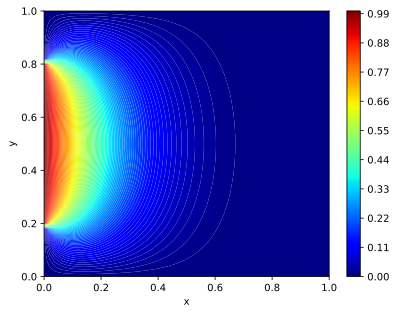

In [10]:
plt.contourf(xx, yy, p, levels=100, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')